# Symbol Synchronization

This script tests the efficacy of frequency offset estimators for QPSK and 16-APSK constellations.

This script does *not* handle phase ambiguity resolution.

In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from digicomm import * # import my helper functions

## Example Frequency Offsets

This cell will create a series of ones and add a frequency offset. This works correctly when the points are rotated about the unit circle in the complex plane.

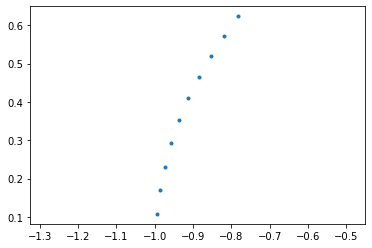

In [2]:
iqs = np.ones((10,), dtype='complex128')
rx = addFrequencyOffset(iqs, nuT=0.01)
rx = addPhaseOffset(rx)

plt.plot(rx.real, rx.imag, '.')
plt.axis('equal')
plt.show()

## QPSK Example

In this noiseless example, we create a series of symbols using a QPSK constellation. Then we attempt to estimate the frequency offset and derotate accordingly. If this works correctly, the deroated points should look like the original constellation, but perhaps with a constant phase offset.

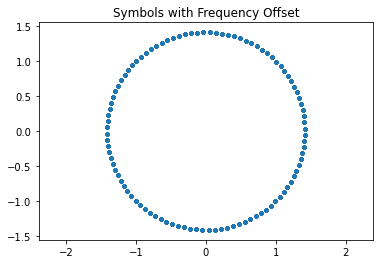

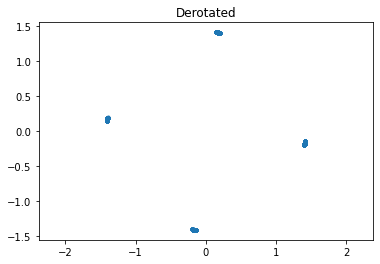

In [4]:
c = constellations['qpsk']
M = len(c)
nsyms = 2048
nbits = nsyms * int(np.log2(M))
bits = np.random.randint(0,2,size=(nbits,))
syms = bitsToSymbols(bits,M)
tx = c[syms]

rx = addPhaseOffset(addFrequencyOffset(tx,nuT=0.01))
plt.plot(rx.real, rx.imag, '.')
plt.axis('equal')
plt.title('Symbols with Frequency Offset')
plt.show()

nuT_hat = freqOffsetEstimationQpsk(rx, mode='interp_1') # estimate frequency offset
rx_2 = addFrequencyOffset(rx,nuT=-nuT_hat) # derotation
plt.plot(rx_2.real, rx_2.imag, '.')
plt.axis('equal')
plt.title('Derotated')
plt.show()